In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
os.getcwd()
from json import load
import pickle

In [19]:
path_res = "/home/ashilova/Adaptive_stopping_MC_RL/code/example_mg/mgres"
li = os.listdir(path_res)
n_iters = {}
decs = {}
for elem in li:
    elem_path = os.path.join(path_res, elem)
    with open(elem_path,"rb") as f:
        params, comp = pickle.load(f)
    dmu = params["diff_means"]

    if dmu in n_iters.keys():
        n_iters[dmu].append(comp["n_iter"] / 2)
    else:
        n_iters[dmu] = [comp["n_iter"]/2]

    if dmu in decs.keys():
        decs[dmu].append(comp["decision"])
    else:
        decs[dmu] = [comp["decision"]]


In [24]:
power = {}
n_iter_avg = {}
for dmu in decs.keys():
    p = np.array(decs[dmu]) == "reject"
    power[dmu] = np.mean(p)
for k in n_iters.keys():
    n_iter_avg[k] = np.mean(n_iters[k])

In [15]:
print(power)

{0.0: 0.04186046511627907, 0.6666666666666666: 0.08411214953271028, 0.1111111111111111: 0.037209302325581395, 0.4444444444444444: 0.08878504672897196, 0.5555555555555556: 0.08878504672897196, 0.3333333333333333: 0.07476635514018691, 0.7777777777777777: 0.0794392523364486, 0.8888888888888888: 0.08411214953271028, 0.2222222222222222: 0.0514018691588785, 1.0: 0.07981220657276995}


In [ ]:
def plot(path, limsup = None):
    all_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    for f in all_folders:
        data = pd.read_csv(path+f+"/progress.csv")
        fig = plt.figure(0)
        if limsup != None:
            data = data[data["time_total_s"]<limsup]
        labels = f.split(",")
        eta = labels[1][4:]
        # "time_total_s" "average_reward" "q_error_train" "kl" "entropy"
        plt.plot(data["time_total_s"], data["average_reward"], label=eta)
    plt.legend()
    plt.show()

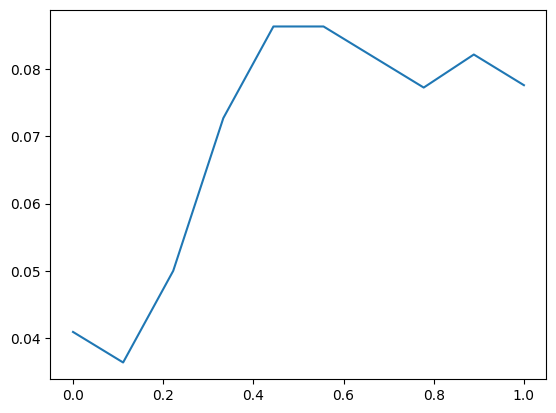

In [21]:
powers = dict(sorted(power.items()))
plt.plot(powers.keys(), powers.values())